In [299]:
import sys
import os
import numpy as np
import matplotlib
# matplotlib.use('pdf') # do this because environment does not have GUI backend
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from scipy.special import factorial
import seaborn as sns
import pandas as pd
import statistics
from scipy import stats
import math
import mpl_axes_aligner
import regex as re
# !{sys.executable} -m pip install regex

font = {'family' : 'Arial',
        'size'   : 8}

matplotlib.rc('font', **font)

print('Complete')

Complete


In [300]:
Act = pd.read_csv('../Supplemental Tables - CSV/HHV-perturbation/HHVpert_ActivD2_combo_expanded.csv')
Rep = pd.read_csv('../Supplemental Tables - CSV/HHV-perturbation/HHVpert_ReprD5_combo_expanded.csv')

oligoID_col = ['HHV-DMS_P12978_010_WT', 'HHV-DMS_P52351_041_WT']
fullID_col = ['P12978_010_WT', 'P52351_041_WT']
seq_col = ['PPPPPPPPPPQRRDAWTQEPSPLDRDPLGYDVGHGPLASAMRMLWMANYIVRQSRGDRGLILPQGPQTAPQARLVQPHVP',
           'TKKKKRYREDDDRELTKDKNDIKELVDAIGMLRHEISALKYIRSQSPQRQHCTAVDTMPTIEEKNVASPKPSVVNASLTP']
tileID_col = ['P12978_010', 'P52351_041']
avg_col = []

for t, p in zip(tileID_col, [146, 446]):
    tempdf = Rep[Rep['Tile ID']==t]
    tempdf['Position'] = tempdf['Position'].astype(float)
    avg_col.append(np.mean(list(tempdf[tempdf['Position']>p]['Avg'])))

start_col = [91, 401]
end_col = [170, 480]
prot_col = ['EBNA2', 'SCAF']
vir_col = ['EBV', 'HHV7']
eff_col = ['repressor', 'repressor']
dash_col = ['-', '-']
other_col = [np.nan, np.nan]

Rep_add = pd.DataFrame({'Oligo ID':oligoID_col, 'R1':other_col, 'countsOFF_R1':other_col, 'countsON_R1':other_col,
                        'R2':other_col, 'countsOFF_R2':other_col, 'countsON_R2':other_col, 'Avg':avg_col,
                        'Standard Error':other_col, 'countsSUM_R1':other_col, 'countsSUM_R2':other_col,
                        'Type':['WT', 'WT'], 'Hit':[1, 1], 'Full Tile ID':fullID_col, 'Protein Sequence':seq_col,
                        'Tile ID':tileID_col, 'Mutation':dash_col, 'Original':dash_col, 'Position':dash_col,
                        'Perturbation':dash_col, 'Tile Start':start_col, 'Tile End':end_col, 'Protein':prot_col,
                        'Virus Abbreviation':vir_col, 'Effect':eff_col})
Rep = pd.concat([Rep, Rep_add])

WT_A = np.mean(list(Act[(Act['Type']=='WT') & (~Act['Standard Error'].isna())]['Standard Error']))
WT_R = np.mean(list(Rep[(Rep['Type']=='WT') & (~Rep['Standard Error'].isna())]['Standard Error']))
print(WT_A, WT_R)

0.21506548936633005 0.1731561095970157


<ipython-input-300-89f84f88321e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Position'] = tempdf['Position'].astype(float)
<ipython-input-300-89f84f88321e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Position'] = tempdf['Position'].astype(float)


In [301]:
motifs = {'ZNF':'C.{2,4}C.{3}.[LIVMFYWC].{8}H.{3,5}H',
          'K9K27':'RKS',
          'SUMO_SIM_anti':'[DEST]{1,10}.{0,1}[VIL][DESTVILMA][VIL][VILM].[DEST]{0,5}',
          'SUMO_SIM_par':'[DEST]{0,5}.[VILPTM][VIL][DESTVILMA][VIL].{0,1}[DEST]{1,10}',
          'SUMO_for':'[VILMAFP](K).E',
          'SUMO_rev':'[SDE].{0,5}[DE].(K).{0,1}[AIFLMPSTV]',
          'HP1':'P[MVLIRWY]V[MVLIAS][LM]',
          'HOMEOBOX':'[FY][DEP]WM',
          'WRPW1':'[WFY]RP[WFY].{0,7}$',
          'WRPW2':'[WFY][KR]P[WFY]',
          'LSD1':'^M{0,1}PR.FLV[KR]K{0,1}.',
          'CtBP_expanded':'P.[DENS][LM].',
          'CtBP_EBNA3':'LDLS',
          'Sin3A_SID':'AA..L',
          'EH1':'FSI..I',
          'NCoR_SMRT_1':'P.K.R',
          'NCoR_SMRT_2':'HKKF',
          'LIG_NRBOX':'[^P]L[^P][^P]LL[^P]',
          'pseudo_NRBOX':'([^P][VIWFY][^P][^P][VLIWFY][VLIWFY][^P])|([^P][VLIWFY][^P][^P][VIWFY][VLIWFY][^P])|([^P][VLIWFY][^P][^P][VLIWFY][VIWFY][^P])',
          'K4':'AR[ST]K',
          'Rb_LxCxE_1':'([DEST]|^).{0,4}[LI].C.E.{1,4}[FLMIVAWPHY].{0,8}([DEST]|$)',
          'Rb_LxCxE_2':'[LI].C.[DE]',
          'Rb_pABgroove_1':'..[LIMV]..[LM][FY]D.',
          'LIG_CORNRBOX':'L[^P]{2,2}[HI]I[^P]{2,2}[IAV][IL]',
          'CBX':'[NQD][VI][VISF][IV]TD[VI]T[YVTSA][DNG][RLGC][LKV][VT]VT[VIF][RK]E[CYF]',
          'MYND_1':'P.L.P',
          'MYND_2':'PP.LI',
          'MYND_3':'[LMV]P.LE',
          'USP7_CTD':'K...K',
          'USP7_MATH_2':'P.E[^P].S[^P]',
          'USP7_MATH_1':'[PA][^P][^FYWIL]S[^P]',
          'DCNL_PONY_1':'^M[MIL].[MIL]',
          'CSL_BTD_1':'[AFILMPTVW]W[FHILMPSTVW]P',
          'CYCLIN_RxL_1':'(.|([KRH].{0,3}))[^EDWNSG][^D][RK][^D]L.{0,1}[FL].{0,3}[EDST]',
          'IRF3_LxIS_1':'[VILPF].{1,3}L.I(S)',
          'WRPW_1':'[WFY]RP[WFY].{0,7}$',
          'WRPW_2':'[WFY][KR]P[WFY]',
          'WW_1':'PP.Y',
          'WW_2':'PPLP',
          'WW_3':'.PPR.'
         }

In [302]:
print(len(motifs))

40


### Categorize mutations by effect

In [303]:
def categorize_mutations(df, effect):
    if effect == 'Activation':
        sigma = WT_A
        df = df[(df['Effect'].isin(['activator', 'dual'])) & (df['Tile ID']!='-')]
        savename = '../Supplemental Tables - CSV/HHV-perturbation/HHVpert_ActivD2_combo_expanded_mutation-effects.csv'
    else:
        sigma = WT_R
        df = df[(df['Effect'].isin(['repressor'])) & (df['Tile ID']!='-')]
        savename = '../Supplemental Tables - CSV/HHV-perturbation/HHVpert_ReprD5_combo_expanded_mutation-effects.csv'
        
    tilelist = list(set(list(df['Tile ID'])))
    newtilelist = []
    newoligoIDlist = []
    catlist = []
    
    for tile in tilelist:
        tempdf = df[df['Tile ID']==tile]
        
        WTscore = list(tempdf.loc[tempdf['Type']=='WT', 'Avg'])[0]
        WTupper = WTscore + 2*sigma
        WTlower = WTscore - 2*sigma
        WTstart = list(tempdf.loc[tempdf['Type']=='WT', 'Tile Start'])[0]
        WTend = list(tempdf.loc[tempdf['Type']=='WT', 'Tile End'])[0]
        
        oligoIDlist = list(tempdf['Oligo ID'])
        avglist = list(tempdf['Avg'])
        hitlist = list(tempdf['Hit'])
        
        newoligoIDlist.extend(oligoIDlist)
        
        for a, h in zip(avglist, hitlist):
            newtilelist.append(tile)
            if h == 0:
                catlist.append('breaking')
            else:
                if a < WTlower:
                    catlist.append('reducing')
                elif (a >= WTlower) & (a <= WTupper):
                    catlist.append('no effect')
                elif a > WTupper:
                    catlist.append('enhancing')
            
    df2 = pd.DataFrame({'Oligo ID':newoligoIDlist, 'Mutation Effect':catlist})
    
    df = pd.merge(df, df2, on=['Oligo ID'], how='outer')
    df.to_csv(savename, index=False)
    return df

Act2 = categorize_mutations(Act, 'Activation')
Rep2 = categorize_mutations(Rep, 'Repression')

print('Mutation effects added')

Mutation effects added


### Initial motif search to identify which are enriched in reducing/breaking regions for final analysis

In [304]:
doms = pd.read_csv('../Supplemental Tables - CSV/HHV-tiling/HHV_domains.csv')

def motif_search(df, motifDict, effect, categories): # df = dataframe, effect = 'Activation' or 'Repression', categories = list
    if effect == 'Activation':
        sigma = WT_A
        savename = '../Supplemental Tables - CSV/HHV-perturbation/HHVpert_Activation_domain_%s_motifs.csv' % '-'.join(categories)
        df = df[~df['Tile ID'].isin(['Q9J3N2_006', 'F5HIC6_025'])]
        actlist = list(doms[doms['Effect']=='Activation']['Tile ID'])
        addlist = ['P03179_055', 'Q2HR71_028', 'P36384_108', 'F5HCV3_060', 'F5HIC6_027']
        doms2 = doms[doms['Tile ID'].isin(actlist + addlist)]
    elif effect == 'Repression':
        sigma = WT_R
        savename = '../Supplemental Tables - CSV/HHV-perturbation/HHVpert_Repression_domain_%s_motifs.csv' % '-'.join(categories)
        replist = list(doms[doms['Effect']=='Repression']['Tile ID'])
        addlist = []
        doms2 = doms[doms['Tile ID'].isin(replist + addlist)]
    
    df = df[df['Type'].isin(['WT', 'deletion'])]
    tilelist = list(set(list(df['Tile ID'])))
    
    newtilelist = []
    WTseqlist = []
    essseq = []
    essstart = []
    essend = []
    mnamelist = []
    mseqlist = []
    mstartlist = []
    mendlist = []
    anyess = []
    anymotif = []
    overlaps = []    
    
    for tile in tilelist:
        tempdf = df[df['Tile ID']==tile]
        WTscore = list(tempdf.loc[tempdf['Type']=='WT', 'Avg'])[0]
        WTupper = WTscore + 2*sigma
        WTlower = WTscore - 2*sigma
        WTseq = list(tempdf.loc[tempdf['Type']=='WT', 'Protein Sequence'])[0]
        WTstart = list(tempdf.loc[tempdf['Type']=='WT', 'Tile Start'])[0]
        WTend = list(tempdf.loc[tempdf['Type']=='WT', 'Tile End'])[0]
        
        tempdf = tempdf[tempdf['Type']=='deletion']
        tempdf['Position'] = tempdf['Position'].astype(int)
        tempdf = tempdf.sort_values(by='Position')
        
        # get starts and ends of regions with user-defined effects on activity
        allstarts = list(tempdf[tempdf['Mutation Effect'].isin(categories)]['Position'])
        allends = [s + 5 for s in allstarts]
        starts = [s for s in allstarts if s not in allends]
        ends = [e - 1 for e in allends if e not in allstarts]
        
        counter = 0
        if len(starts) == 0: # i.e. no essential regions
            for m in motifDict:
                matches = re.findall(motifDict[m], WTseq, overlapped=True)
                if len(matches) != 0:
                    counter += 1
                    for i in matches:
                        if type(i) == tuple:
                            for ii in i:
                                if len(ii) != 0:
                                    i = ii
                        
                        # check overlap with reducing and breaking regions, or only breaking regions
                        i_s = re.search(i, WTseq).start()
                        i_s += WTstart
                        i_e = i_s + len(i) - 1
                        
                        newtilelist.append(tile)
                        WTseqlist.append(WTseq)
                        essseq.append('')
                        essstart.append(0)
                        essend.append(0)
                        mnamelist.append(m)
                        mseqlist.append(i)
                        mstartlist.append(int(i_s))
                        mendlist.append(int(i_e))
                        anyess.append(0)
                        anymotif.append(1)
                        overlaps.append(0)
            
            if counter == 0: # i.e. no essential regions and no motifs (after searching for all)
                newtilelist.append(tile)
                WTseqlist.append(WTseq)
                essseq.append('')
                essstart.append(0)
                essend.append(0)
                mnamelist.append('')
                mseqlist.append('')
                mstartlist.append(0)
                mendlist.append(0)
                anyess.append(0)
                anymotif.append(0)
                overlaps.append(0)
        
        else: # if at least one essential region (based on length of start/end list)
            for s, e in zip(starts, ends):
                for m in motifDict:
                    matches = re.findall(motifDict[m], WTseq, overlapped=True)
                    if len(matches) != 0:
                        counter += 1
                        for i in matches:
                            if type(i) == tuple:
                                for ii in i:
                                    if len(ii) != 0:
                                        i = ii

                            # check overlap with reducing and breaking regions, or only breaking regions
                            i_s = re.search(i, WTseq).start()
                            i_s += WTstart
                            i_e = i_s + len(i) - 1

                            newtilelist.append(tile)
                            WTseqlist.append(WTseq)
                            mnamelist.append(m)
                            mseqlist.append(i)
                            mstartlist.append(int(i_s))
                            mendlist.append(int(i_e))
                            anymotif.append(1)

                            if (i_e < s) | (i_s > e):
                                essseq.append('')
                                essstart.append(0)
                                essend.append(0)
                                anyess.append(1)
                                overlaps.append(0)
                            else:
                                essseq.append(WTseq[int(s - WTstart):int(e - WTstart + 1)])
                                essstart.append(s)
                                essend.append(e)
                                anyess.append(1)
                                overlaps.append(1)
                    
                    
                if counter == 0:
                    newtilelist.append(tile)
                    WTseqlist.append(WTseq)
                    essseq.append(WTseq[int(s - WTstart):int(e - WTstart + 1)])
                    essstart.append(s)
                    essend.append(e)
                    mnamelist.append('')
                    mseqlist.append('')
                    mstartlist.append(0)
                    mendlist.append(0)
                    anyess.append(1)
                    anymotif.append(0)
                    overlaps.append(0)
    
    colbase = '/'.join([i[0].upper() + i[1:] for i in categories])
    anyesscol = 'Contains ' + colbase + ' Region?'
    df2 = pd.DataFrame({'Tile ID':newtilelist, (colbase + ' Sequence'):essseq, (colbase + ' Start'):essstart,
                        (colbase + ' End'):essend, 'Motif Name':mnamelist, 'Motif Sequence':mseqlist,
                         'Max Sequence':WTseqlist, 'Motif Start':mstartlist, 'Motif End':mendlist,
                         anyesscol:anyess, 'Contains Motif?':anymotif, 'Overlaps?':overlaps})
    df2['Protein ID'] = df2['Tile ID'].str.split('_').str[0]
    df2 = pd.merge(doms2, df2, on=['Protein ID', 'Tile ID', 'Max Sequence'], how='right')
    exclude1 = ['Homolog', 'Essential', 'Location', 'Specificity']
    df2 = df2[[c for c in list(df2.columns) if c not in exclude1]]
    df2 = df2.sort_values(by=['Tile ID', 'Motif Start', 'Motif Name', anyesscol, 'Contains Motif?', 'Overlaps?'], ascending=[True, True, True, False, False, False])
    df2 = df2.drop_duplicates(subset=['Tile ID', 'Motif Name', 'Motif Sequence', 'Motif Start', 'Motif End'])
    if effect == 'Activation':
        df2.loc[df2['Tile ID']=='F5HIC6_027', 'Max Start'] = 261
        df2.loc[df2['Tile ID']=='F5HIC6_027', 'Max End'] = 340
        df2.loc[df2['Tile ID']=='F5HIC6_027', 'Protein'] = 'VIRF3'
        df2.loc[df2['Tile ID']=='F5HIC6_027', 'Virus'] = 'KSHV'
    elif effect == 'Repression':
        df2.loc[df2['Tile ID']=='P52351_041', 'Max Start'] = 401
        df2.loc[df2['Tile ID']=='P52351_041', 'Max End'] = 480
        df2.loc[df2['Tile ID']=='P52351_041', 'Protein'] = 'SCAF'
        df2.loc[df2['Tile ID']=='P52351_041', 'Virus'] = 'HHV7'
    df2.to_csv(savename, index=False)
    return df2
      
mActNE = motif_search(Act2, motifs, 'Activation', ['no effect', 'enhancing'])
mActRB = motif_search(Act2, motifs, 'Activation', ['reducing', 'breaking'])
mActB = motif_search(Act2, motifs, 'Activation', ['breaking'])
mRepNE = motif_search(Rep2, motifs, 'Repression', ['no effect', 'enhancing'])
mRepRB = motif_search(Rep2, motifs, 'Repression', ['reducing', 'breaking'])
mRepB = motif_search(Rep2, motifs, 'Repression', ['breaking'])

print('Complete')

Complete


#### Barplots for initial motif search (not featured in a figure panel)

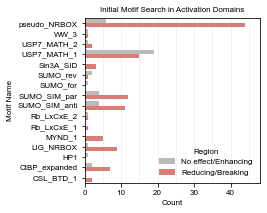

In [305]:
mActRB2 = mActRB[['Tile ID', 'Motif Name', 'Contains Reducing/Breaking Region?', 'Contains Motif?', 'Overlaps?']]
mActRB2 = mActRB2.groupby(by=['Motif Name', 'Overlaps?']).sum().reset_index()
mActRB2 = mActRB2.sort_values(by=['Motif Name', 'Overlaps?'], ascending=[False, True])
mActRB2['Overlaps?'] = mActRB2['Overlaps?'].replace([0, 1], ['No effect/Enhancing', 'Reducing/Breaking'])
plt.figure(figsize=(3.75,3))
pal = sns.color_palette(['#BBBBBB', '#EA7063'])
sns.barplot(data=mActRB2, y='Motif Name', x='Contains Motif?', hue='Overlaps?', palette=pal)
plt.legend(frameon=False, title='Region', fontsize=8, loc='lower right', bbox_to_anchor=(1,0))
plt.xlim(0, 48)
plt.xlabel('Count')
for i in range(0, 50, 5):
    plt.axvline(x=i, color='#BBBBBB', ls=':', lw=0.5, zorder=-1)
plt.title('Initial Motif Search in Activation Domains', fontsize=8)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S5/HHV_Activation-domains_reducing-breaking_initial-motif-search-summary.png', dpi=1200)


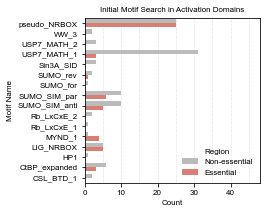

In [306]:
mActB2 = mActB[['Tile ID', 'Motif Name', 'Contains Breaking Region?', 'Contains Motif?', 'Overlaps?']]
mActB2 = mActB2.groupby(by=['Motif Name', 'Overlaps?']).sum().reset_index()
mActB2 = mActB2.sort_values(by=['Motif Name', 'Overlaps?'], ascending=[False, True])
mActB2['Overlaps?'] = mActB2['Overlaps?'].replace([0, 1], ['Non-essential', 'Essential'])
plt.figure(figsize=(3.75,3))
pal = sns.color_palette(['#BBBBBB', '#EA7063'])
sns.barplot(data=mActB2, y='Motif Name', x='Contains Motif?', hue='Overlaps?', palette=pal)
plt.legend(frameon=False, title='Region', fontsize=8, loc='lower right', bbox_to_anchor=(1,0))
plt.xlim(0, 48)
plt.xlabel('Count')
for i in range(0, 50, 5):
    plt.axvline(x=i, color='#BBBBBB', ls=':', lw=0.5, zorder=-1)
plt.title('Initial Motif Search in Activation Domains', fontsize=8)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S5/HHV_Activation-domains_breaking_initial-motif-search-summary.png', dpi=1200)


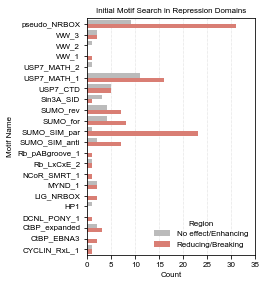

In [307]:
mRepRB2 = mRepRB[['Tile ID', 'Motif Name', 'Contains Reducing/Breaking Region?', 'Contains Motif?', 'Overlaps?']]
mRepRB2 = mRepRB2.groupby(by=['Motif Name', 'Overlaps?']).sum().reset_index()
mRepRB2 = mRepRB2.sort_values(by=['Motif Name', 'Overlaps?'], ascending=[False, True])
mRepRB2['Overlaps?'] = mRepRB2['Overlaps?'].replace([0, 1], ['No effect/Enhancing', 'Reducing/Breaking'])
mRepRB2 = mRepRB2[mRepRB2['Motif Name']!='']
plt.figure(figsize=(3.75,4))
pal = sns.color_palette(['#BBBBBB', '#EA7063'])
sns.barplot(data=mRepRB2, y='Motif Name', x='Contains Motif?', hue='Overlaps?', palette=pal)
plt.legend(frameon=False, title='Region', fontsize=8, loc='lower right', bbox_to_anchor=(1,0))
plt.xlim(0, 35)
plt.xlabel('Count')
for i in range(0, 50, 5):
    plt.axvline(x=i, color='#BBBBBB', ls=':', lw=0.5, zorder=-1)
plt.title('Initial Motif Search in Repression Domains', fontsize=8)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S5/HHV_Repression-domains_reducing-breaking_initial-motif-search-summary.png', dpi=1200)


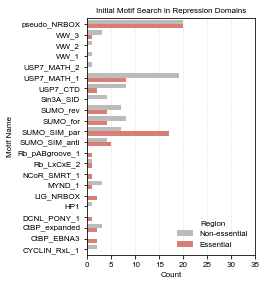

In [308]:
mRepB2 = mRepB[['Tile ID', 'Motif Name', 'Contains Breaking Region?', 'Contains Motif?', 'Overlaps?']]
mRepB2 = mRepB2.groupby(by=['Motif Name', 'Overlaps?']).sum().reset_index()
mRepB2 = mRepB2.sort_values(by=['Motif Name', 'Overlaps?'], ascending=[False, True])
mRepB2['Overlaps?'] = mRepB2['Overlaps?'].replace([0, 1], ['Non-essential', 'Essential'])
mRepB2 = mRepB2[mRepB2['Motif Name']!='']
plt.figure(figsize=(3.75,4))
pal = sns.color_palette(['#BBBBBB', '#EA7063'])
sns.barplot(data=mRepB2, y='Motif Name', x='Contains Motif?', hue='Overlaps?', palette=pal)
plt.legend(frameon=False, title='Region', fontsize=8, loc='lower right', bbox_to_anchor=(1,0))
plt.xlim(0, 35)
plt.xlabel('Count')
for i in range(0, 50, 5):
    plt.axvline(x=i, color='#BBBBBB', ls=':', lw=0.5, zorder=-1)
plt.title('Initial Motif Search in Repression Domains', fontsize=8)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S5/HHV_Repression-domains_breaking_initial-motif-search-summary.png', dpi=1200)


### Final motif search

In [309]:
motifs2 = {'SUMO_SIM_anti':'[DEST]{1,10}.{0,1}[VIL][DESTVILMA][VIL][VILM].[DEST]{0,5}',
          'SUMO_SIM_par':'[DEST]{0,5}.[VILPTM][VIL][DESTVILMA][VIL].{0,1}[DEST]{1,10}',
          'SUMO_for':'[VILMAFP](K).E',
          'SUMO_rev':'[SDE].{0,5}[DE].(K).{0,1}[AIFLMPSTV]',
          'HP1':'P[MVLIRWY]V[MVLIAS][LM]',
          'CtBP_expanded':'P.[DENS][LM].',
          'CtBP_EBNA3':'LDLS',
          'Sin3A_SID':'AA..L',
          'NCoR_SMRT_1':'P.K.R',
          'LIG_NRBOX':'[^P]L[^P][^P]LL[^P]',
          'pseudo_NRBOX':'([^P][VIWF][^P][^P][VLIFY][VLIF][^P])|([^P][VLIWF][^P][^P][VIFY][VLIF][^P])|([^P][VLIWF][^P][^P][VLIFY][VIF][^P])',
          'MYND_1':'P.L.P',
          'CSL_BTD_1':'[AFILMPTVW]W[FHILMPSTVW]P',
          'WW_1':'PP.Y',
          'WW_2':'PPLP',
          'WW_3':'.PPR.'
         }

Number of activation domains to analyze: 39
Category A: number of domains without any essential regions or motifs: 1
Category B: number of domains without any essential regions but with motifs: 8
Category C: number of domains with essential regions but no motifs: 4
Category D: number of domains with essential regions and motifs, but none of these overlap: 7
Category E: number of domains with a mix of essential regions with and without motifs: 12
Category F: number of domains where all essential regions have motifs: 7

            Motif  Activation
0            SUMO           1
1             SIM          11
2            CtBP           3
3            MYND           4
4  NR box (LxxLL)           5
5     flexiNR box          22
6           Other           0 

Number of repression domains to analyze: 53
Category A: number of domains without any essential regions or motifs: 1
Category B: number of domains without any essential regions but with motifs: 3
Category C: number of domains with ess

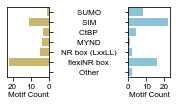

In [310]:
motif_cats = ['SUMO', 'SIM', 'CtBP', 'MYND', 'NR box (LxxLL)', 'flexiNR box', 'Other']

def quantify_motifs(df, effect):        
    EM000 = df[(df['Contains Breaking Region?']==0) & (df['Contains Motif?']==0) & (df['Overlaps?']==0)]
    EM010 = df[(df['Contains Breaking Region?']==0) & (df['Contains Motif?']==1) & (df['Overlaps?']==0)]
    EM100 = df[(df['Contains Breaking Region?']==1) & (df['Contains Motif?']==0) & (df['Overlaps?']==0)]
    EM110 = df[(df['Contains Breaking Region?']==1) & (df['Contains Motif?']==1) & (df['Overlaps?']==0)]
    EM111 = df[(df['Contains Breaking Region?']==1) & (df['Contains Motif?']==1) & (df['Overlaps?']==1)]
    
    em000 = list(set(list(EM000['Tile ID'])))
    em010 = list(set(list(EM010['Tile ID'])))
    em100 = list(set(list(EM100['Tile ID'])))
    em110 = list(set(list(EM110['Tile ID'])))
    em111 = list(set(list(EM111['Tile ID'])))
    
    em110_only = [i for i in em110 if i not in em111]
    em111_only = [i for i in em111 if i not in em110]
    em110_em111_mix = [i for i in em111 if i in em110]
    
    print('Category A: number of domains without any essential regions or motifs: %d' % len(em000))
    print('Category B: number of domains without any essential regions but with motifs: %d' % len(em010))
    print('Category C: number of domains with essential regions but no motifs: %d' % len(em100))
    print('Category D: number of domains with essential regions and motifs, but none of these overlap: %d' % len(em110_only))
    print('Category E: number of domains with a mix of essential regions with and without motifs: %d' % len(em110_em111_mix))
    print('Category F: number of domains where all essential regions have motifs: %d\n' % len(em111_only))
    
    EM111g = EM111.copy()
    motifreplace = {'CtBP_expanded':'CtBP', 'CtBP_EBNA3':'CtBP', 'SUMO_SIM_anti':'SIM', 'SUMO_SIM_par':'SIM',
                    'SUMO_for':'SUMO', 'SUMO_rev':'SUMO', 'MYND_1':'MYND', 'LIG_NRBOX':'NR box (LxxLL)', 'pseudo_NRBOX':'flexiNR box',
                    'NCoR_SMRT_1':'Other', 'WW_3':'Other'}
    EM111g['Motif'] = EM111g['Motif Name'].map(motifreplace)
    EM111g['Motif'] = pd.Categorical(EM111g['Motif'], categories=motif_cats, ordered=True)
    
    EM111g = EM111g[['Motif', 'Contains Motif?']].groupby(by='Motif').sum().reset_index().sort_values(by='Motif')
    EM111g = EM111g.rename(columns={'Contains Motif?':effect})
    print(EM111g, '\n')
    return EM111g

# exclude the following because they are redundant (adjacent to max tile) or primarily repressors
excludeA = ['Q9J3N2_006', 'F5HIC6_025', 'F5HCV3_060', 'P36384_108', 'P03179_055', 'Q2HR71_028']
Act3 = Act2[~Act2['Tile ID'].isin(excludeA)]
print('Number of activation domains to analyze: %d' % len(set(list(Act3['Tile ID']))))
mAct2 = motif_search(Act3, motifs2, 'Activation', ['breaking'])
mAct2_plot = quantify_motifs(mAct2, 'Activation')

excludeR = ['F5HIC6_027']
Rep3 = Rep2[~Rep2['Tile ID'].isin(excludeR)]
print('Number of repression domains to analyze: %d' % len(set(list(Rep3['Tile ID']))))
mRep2 = motif_search(Rep3, motifs2, 'Repression', ['breaking'])
mRep2_plot = quantify_motifs(mRep2, 'Repression')

df_plot = pd.merge(mAct2_plot, mRep2_plot, on='Motif', how='outer')
# df_plot['Motif'] = df_plot['Motif'].replace(['NR box'], ['NR box (LxxLL)'])

colors = ['#D6BF5C', '#7CCCE4']
fig, ax = plt.subplots(1, 2, figsize=(2.5, 1.5))
sns.barplot(data=df_plot, x='Activation', y='Motif', ax=ax[0], color=colors[0])
ax[0].invert_xaxis()
ax[0].set_xticks([0, 10, 20])
ax[0].set_xlabel('Motif Count', labelpad=1.5)# in Activation\nEssential Regions')
ax[0].set_ylabel('')
ax[0].yaxis.tick_right()
ax[0].set_yticklabels([])

sns.barplot(data=df_plot, x='Repression', y='Motif', ax=ax[1], color=colors[1])
ax[1].set_xticks([0, 10, 20])
ax[1].set_xlabel('Motif Count', labelpad=1.5) # in Repression\nEssential Regions')
ax[1].set_yticklabels([m + '                             ' for m in motif_cats], ha='center')
ax[1].set_ylabel('')
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure 5/HHV_effector_domain_motif_count_summary.png', dpi=1200)


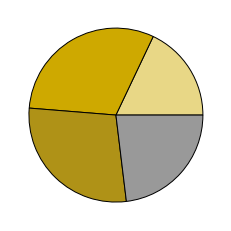

In [311]:
plt.pie([7, 12, 11, 9], colors=['#E8D786', '#CEA900', '#AF9217', '#999999'],
        wedgeprops = {'edgecolor':'k', 'linewidth': 1})

plt.savefig('../Individual Figure Panels/Figure 5/HHV_Activation_motif_pie.png', dpi=1200)

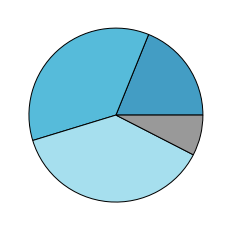

In [312]:
plt.pie([10, 19, 20, 4], colors=['#439DC4', '#56BBDA', '#A6DFEE', '#999999'],
        wedgeprops = {'edgecolor':'k', 'linewidth': 1})
plt.savefig('../Individual Figure Panels/Figure 5/HHV_Repression_motif_pie.png', dpi=1200)

### Logos for intial pseudo NR

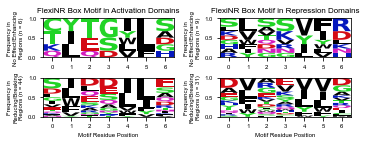

In [313]:
# !{sys.executable} -m pip install logomaker
import logomaker
font = {'family' : 'Arial',
        'size'   : 6}

matplotlib.rc('font', **font)

resorder = ['G', 'A', 'V', 'L', 'M', 'I', 'F', 'Y', 'W', 'K', 'R', 'H', 'D', 'E', 'S', 'T', 'C', 'N', 'Q', 'P', 'X'] #, 'X', '*', '-']

basemat = pd.DataFrame({aa:np.zeros(7) for aa in resorder})

def make_matrix(df, iterlist):
    for i in iterlist:
        for j, k in zip(list(i), range(7)):
            df.loc[k, j] += 1
    df = df.div(df.sum(axis=1), axis=0).drop(columns='X')
    return df

Anelist = list(mActRB[(mActRB['Overlaps?']==0) & (mActRB['Motif Name']=='pseudo_NRBOX')]['Motif Sequence'])
Arblist = list(mActRB[(mActRB['Overlaps?']==1) & (mActRB['Motif Name']=='pseudo_NRBOX')]['Motif Sequence'])
Rnelist = list(mRepRB[(mRepRB['Overlaps?']==0) & (mRepRB['Motif Name']=='pseudo_NRBOX')]['Motif Sequence'])
Rrblist = list(mRepRB[(mRepRB['Overlaps?']==1) & (mRepRB['Motif Name']=='pseudo_NRBOX')]['Motif Sequence'])

### VERY IMPORTANT - MUST MAKE A NEW BASE MATRIX RIGHT BEFORE CALLING FUNCTION OR ELSE PREVIOUS MATRIX BECOMES BASE
### ^^^ NOT SURE WHY THIS HAPPENS OTHERWISE
basemat_Ane = pd.DataFrame({aa:np.zeros(7) for aa in resorder})
Ane_mat = make_matrix(basemat_Ane, Anelist)

basemat_Arb = pd.DataFrame({aa:np.zeros(7) for aa in resorder})
Arb_mat = make_matrix(basemat_Arb, Arblist)

basemat_Rne = pd.DataFrame({aa:np.zeros(7) for aa in resorder})
Rne_mat = make_matrix(basemat_Rne, Rnelist)

basemat_Rrb = pd.DataFrame({aa:np.zeros(7) for aa in resorder})
Rrb_mat = make_matrix(basemat_Rrb, Rrblist)

fig, ax = plt.subplots(2, 2, figsize=(5,2))
logomaker.Logo(Ane_mat, ax=ax[0, 0])
logomaker.Logo(Arb_mat, ax=ax[1, 0])
ax[0, 0].set_ylabel('Frequency in\nNo Effect/Enhancing\nRegions (n = %d)' % len(Anelist), fontsize=6)
ax[1, 0].set_xlabel('Motif Residue Position')
ax[1, 0].set_ylabel('Frequency in\nReducing/Breaking\nRegions (n = %d)' % len(Arblist), fontsize=6)
ax[0, 0].set_title('FlexiNR Box Motif in Activation Domains', fontsize=8)

logomaker.Logo(Rne_mat, ax=ax[0, 1])
logomaker.Logo(Rrb_mat, ax=ax[1, 1])
ax[0, 1].set_ylabel('Frequency in\nNo Effect/Enhancing\nRegions (n = %d)' % len(Rnelist), fontsize=6)
ax[1, 1].set_xlabel('Motif Residue Position')
ax[1, 1].set_ylabel('Frequency in\nReducing/Breaking\nRegions (n = %d)' % len(Rrblist), fontsize=6)
ax[0, 1].set_title('FlexiNR Box Motif in Repression Domains', fontsize=8)

# for a in ax.flatten():
#     a.set_xticks(range(7))
#     a.set_xticklabels(labels=a.get_xticklabels(), fontsize=6)
#     a.set_yticklabels(labels=a.get_yticklabels(), fontsize=6)

plt.tight_layout()

plt.savefig('../Individual Figure Panels/Figure S5/HHV_effector_domains_initial_flexiNRBOX_search.png', dpi=1200)



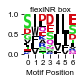

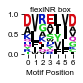

In [314]:
import logomaker
font = {'family' : 'Arial',
        'size'   : 8}

matplotlib.rc('font', **font)

Ablist = list(mAct2[(mAct2['Overlaps?']==1) & (mAct2['Motif Name']=='pseudo_NRBOX')]['Motif Sequence'])
Rblist = list(mRep2[(mRep2['Overlaps?']==1) & (mRep2['Motif Name']=='pseudo_NRBOX')]['Motif Sequence'])

basemat = pd.DataFrame({aa:np.zeros(7) for aa in resorder})
Ab_mat = make_matrix(basemat, Ablist)
basemat = pd.DataFrame({aa:np.zeros(7) for aa in resorder})
Rb_mat = make_matrix(basemat, Rblist)

def plot_logo(matrix, effect, nummotifs):
    fig, ax = plt.subplots(figsize=(1.2, 1.2))
    logomaker.Logo(matrix, ax=ax)
    ax.set_title('flexiNR box', fontsize=8, pad=2)# (n = %d)' % nummotifs, pad=2, fontsize=8) #Pseudo NR Box Motif in Activation Domains', fontsize=8)
    ax.set_xlabel('Motif Position')
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
    ax.tick_params(axis='x', pad=2)
    ax.set_ylabel('') #'Frequency in\nNo Effect/Enhancing\nRegions (n = %d)' % len(Anelist))#, fontsize=6)
    ax.set_yticks([0, 0.5, 1])
    ax.tick_params(axis='y', pad=2)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig('../Individual Figure Panels/Figure 5/HHV_%s_domains_essential-regions_flexiNRBOX_search.png' % effect, dpi=1200)
    
plot_logo(Ab_mat, 'Activation', len(Ablist))
plot_logo(Rb_mat, 'Repression', len(Rblist))

### Chemical inhibition

In [315]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import geometric_mean

# do once to create file
font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

# from primary screen
orig_cutoffA = 1.0846347878236864
orig_cutoffR = 0.6987727639587653

# filter out library members with too few reads, add meta data about perturbation type, and calculate hits threshold
# screen_type should be 'Act' or 'Rep'
def process_screen(df, screen_type, condition, sigma, counts_filter):
    df['countsSUM_R1'] = df['countsON_R1'] + df['countsOFF_R1']
    df['countsSUM_R2'] = df['countsON_R2'] + df['countsOFF_R2']
    df = df[(df['countsSUM_R1']>=counts_filter) & (df['countsSUM_R2']>=counts_filter)]
    
    if screen_type == 'Act':
        df['R1'] = -df['R1']
        df['R2'] = -df['R2']
        df['Avg'] = -df['Avg']
        
    rand = list(df[(df['Oligo ID'].str.contains('random')) & (df['Effect']=='-')]['Avg'])
    thresh = np.mean(rand) + sigma*np.std(rand)
    df['Hit'] = np.where(df['Avg']>=thresh, 1, 0)
    df['Condition'] = screen_type + '_' + condition
    
    print('%s screen:' % (screen_type + '_' + condition))
    print('\tElements passing summed counts filter of %d: %d' % (counts_filter, len(df)))
    print('\tHits threshold with %d*sigma: %s' % (sigma, str(thresh)))
    
    return df, thresh

# add additional information, including fiducial details, WT tile effect, and other meta data
# IMPORTANT: all mutations are off by +1, so this code corrects for that
def add_info(df, fiducials, prot_seqs, condition):
    # merge in fiducial information and protein sequences
    df = df.rename(columns={'label':'Oligo ID'})
    df['Oligo ID'] = np.where(df['Oligo ID'].str.contains('random_'), 'HHV-Hits_random-' + df['Oligo ID'].str.split('_').str[2:].str.join('_'), df['Oligo ID'])
    df['Tile ID'] = df['Oligo ID'].str.split('_').str[1:].str.join('_')

    df = pd.merge(df, fiducials[['Tile ID', 'Gene', 'Effect']], on=['Tile ID'], how='left')
    df = pd.merge(df, prot_seqs.rename(columns={'Name':'Tile ID'}), on=['Oligo ID', 'Tile ID'], how='left')
    df['Protein'] = np.where(df['Type']=='fiducial control', df['Gene'], df['Protein'])
    
    df['Effect'] = np.where(df['Activation']>=orig_cutoffA, 'activator', df['Effect'])
    df['Effect'] = np.where(df['Repression']>=orig_cutoffR, 'repressor', df['Effect'])
    df['Effect'] = np.where((df['Activation']>=orig_cutoffA) & (df['Repression']>=orig_cutoffR), 'dual', df['Effect'])
    df['Effect'] = np.where(df['Effect'].isnull(), '-', df['Effect'])
    df = df.drop(columns=['Gene'])
    
    return df

fiducials = pd.read_csv('../Supplemental Tables - CSV/fiducial_controls.csv', sep=',').drop(columns='Unnamed: 0')
fiducials['Number'] = fiducials.index + 1
fiducials['Tile ID'] = 'fiducial_' + fiducials['Number'].astype(str).str.zfill(3)
fiducials['Effect'] = np.where(fiducials['Description'].str.contains('Repr'), 'repressor', 'activator')
fiducials['Effect'] = np.where(fiducials['label'].str.contains('random'), '-', fiducials['Effect'])

prot_seqs = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_added-info.csv')

# read in necessary files as dataframes: screen scores, fiducials, and details on original WT max tiles
Act_DMSO = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Act_DMSO_combo.csv', sep=',')
Act_DMSO = add_info(Act_DMSO, fiducials, prot_seqs, 'Act_DMSO')
Act_DMSO, threshA_DMSO = process_screen(Act_DMSO, 'Act', 'DMSO', 2, 50)
Act_DMSO.to_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Act_DMSO_combo_expanded.csv', index=False)

Act_SGC = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Act_SGC-CBP30_combo.csv', sep=',')
Act_SGC = add_info(Act_SGC, fiducials, prot_seqs, 'Act_SGC-CBP30')
Act_SGC, threshA_SGC = process_screen(Act_SGC, 'Act', 'SGC-CBP30', 2, 50)
Act_SGC.to_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Act_SGC-CBP30_combo_expanded.csv', index=False)

Rep_DMSO = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Rep_DMSO_combo.csv', sep=',')
Rep_DMSO = add_info(Rep_DMSO, fiducials, prot_seqs, 'Rep_DMSO')
Rep_DMSO, threshR_DMSO = process_screen(Rep_DMSO, 'Rep', 'DMSO', 2, 50)
Rep_DMSO.to_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Rep_DMSO_combo_expanded.csv', index=False)

Rep_taz = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Rep_taz_combo.csv', sep=',')
Rep_taz = add_info(Rep_taz, fiducials, prot_seqs, 'Rep_taz')
Rep_taz, threshR_taz = process_screen(Rep_taz, 'Rep', 'taz', 2, 50)
Rep_taz.to_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Rep_taz_combo_expanded.csv', index=False)

Rep_TMP = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Rep_TMP269_combo.csv', sep=',')
Rep_TMP = add_info(Rep_TMP, fiducials, prot_seqs, 'Rep_TMP269')
Rep_TMP, threshR_TMP = process_screen(Rep_TMP, 'Rep', 'TMP269', 2, 50)
Rep_TMP.to_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_Rep_TMP269_combo_expanded.csv', index=False)


<ipython-input-315-a7878ce7a4f9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R1'] = -df['R1']
<ipython-input-315-a7878ce7a4f9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R2'] = -df['R2']
<ipython-input-315-a7878ce7a4f9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Act_DMSO screen:
	Elements passing summed counts filter of 50: 1004
	Hits threshold with 2*sigma: -0.579627122236684
Act_SGC-CBP30 screen:
	Elements passing summed counts filter of 50: 1002
	Hits threshold with 2*sigma: -0.49891899387213723
Rep_DMSO screen:
	Elements passing summed counts filter of 50: 996
	Hits threshold with 2*sigma: -0.17959803772519833
Rep_taz screen:
	Elements passing summed counts filter of 50: 978
	Hits threshold with 2*sigma: -0.031428002052666715
Rep_TMP269 screen:
	Elements passing summed counts filter of 50: 1001
	Hits threshold with 2*sigma: -0.15469759287329365


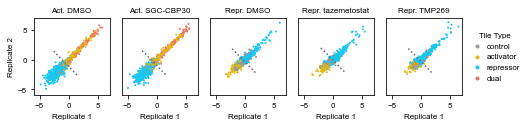

In [316]:
fig, ax = plt.subplots(1, 5, figsize=(7.5,1.8))
dfList = [Act_DMSO, Act_SGC, Rep_DMSO, Rep_taz, Rep_TMP]
titleList = ['Act. DMSO', 'Act. SGC-CBP30', 'Repr. DMSO', 'Repr. tazemetostat', 'Repr. TMP269']
threshList = [threshA_DMSO, threshA_SGC, threshR_DMSO, threshR_taz, threshR_TMP]
axrange = range(5)
colors = ['#999999', '#E3B919', '#1BC6EE', '#EA7063']

for d, l, t, i in zip(dfList, titleList, threshList, axrange):
    d['Effect'] = np.where(d['Effect']=='-', 'control', d['Effect'])
    d['Effect'] = pd.Categorical(d['Effect'], categories=['control', 'activator', 'repressor', 'dual'])

    sns.scatterplot(data=d, x='R1', y='R2', ax=ax[i], linewidth=0, hue='Effect', s=4, palette=colors) #, style='Type')
    ax[i].set_xlabel('Replicate 1')
    ax[i].set_xlim(-6, 7)
    ax[i].set_ylim(-6, 7)
    if i == 0:
        ax[i].set_ylabel('Replicate 2')
    else:
        ax[i].set_ylabel('')
        ax[i].set_yticks([])
        
    ax[i].plot([t-2, t+2], [t+2, t-2], ls=':', color='#666666')
    ax[i].set_title(l, fontsize=8)
    if i == 4:
        ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, title='Tile Type',
                     markerscale=0.5, handletextpad=0.2)
    else:
        ax[i].legend('', frameon=False)
plt.tight_layout()
plt.savefig('../Individual Figure Panels/Figure S5/HHVhits_chem-inhib_reproducibility_scatter.png', dpi=1200)

#### p300/CBP inhibition with SGC-CBP30 - plot tiles from top 10 most sensitive proteins as featured in Fig. 5M

Number of hit tiles sensitive to inhibition: 33
Number of proteins with hit tiles sensitive to inhibition: 14


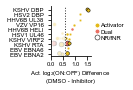

In [317]:
import random
from matplotlib.lines import Line2D

A_DMSO_avg = Act_DMSO[['Tile ID', 'Protein', 'Protein Sequence', 'Avg', 'Effect', 'Type', 'Virus Abbreviation']].rename(columns={'Avg':'DMSO'})
A_SGC_avg = Act_SGC[['Tile ID', 'Avg']].rename(columns={'Avg':'SGC-CBP30'})
plot_df = pd.merge(A_DMSO_avg, A_SGC_avg, on='Tile ID', how='inner')
plot_df['UniProt ID'] = plot_df['Tile ID'].str.split('_').str[0]
plot_df['Diff'] = plot_df['DMSO'] - plot_df['SGC-CBP30']
plot_df['anyNR'] = np.where(plot_df['Protein Sequence'].str.contains('[^P][VLIWF][^P][^P][VLIFY][VLIF][^P]'), 1, 0)

plot_df = plot_df[plot_df['Effect']!='-']
plot_df = plot_df[plot_df['Type']=='HHV tile']
eff_scores = list(plot_df[plot_df['Effect'].str.contains('repressor')]['Diff'])
eff_mean = np.mean(eff_scores)
eff_std = np.std(eff_scores)
upperlimSGC = eff_mean + 2*eff_std
lowerlim = eff_mean - 2*eff_std
print('Number of hit tiles sensitive to inhibition:', len(plot_df[plot_df['Diff']>upperlimSGC]))
dfA_SGC = plot_df[plot_df['DMSO']>threshA_DMSO]

# plot_df = plot_df[plot_df['Effect']!='repressor']
plot_df = plot_df[plot_df['DMSO']>threshA_DMSO]
plot_df['Effect'] = pd.Categorical(plot_df['Effect'], categories=['activator', 'repressor', 'dual'], ordered=True)

tokeep = list(set(list(plot_df[plot_df['Diff']>upperlimSGC]['UniProt ID'])))
plot_df = plot_df[plot_df['UniProt ID'].isin(tokeep)]
plot_df = plot_df.sort_values(by=['Diff'], ascending=False).reset_index(drop=True)
plot_df['ID'] = plot_df['Protein'] + ' ' + plot_df['UniProt ID']
plot_df['ID2'] = plot_df['Virus Abbreviation'] + ' ' + plot_df['Protein']

tokeep2 = plot_df[['UniProt ID', 'Diff']].groupby('UniProt ID', sort=False).sum().reset_index().drop_duplicates(subset='UniProt ID')
print('Number of proteins with hit tiles sensitive to inhibition:', len(tokeep2))
tokeep2 = list(tokeep2['UniProt ID'])[:10]

plot_df = plot_df[plot_df['UniProt ID'].isin(tokeep2)]

tile = list(plot_df['Tile ID'])
xpos = list(plot_df['Diff'])
ypos = list(plot_df['ID2'])
size = list(plot_df['DMSO'])
size = [((s+min(size))/(max(size)+min(size))+1.5)*2 for s in size]
effect = list(plot_df['Effect'])
anyNR = list(plot_df['anyNR'])

colorDict = {'activator':'#E3B919', 'dual':'#EA7063'}
tiles = ['P06492_041', 'P03209_052', 'Q2HRC9_015', 'Q2HR71_017', 'F5HCV3_054', 'Q2HRD3_107']

plt.figure(figsize=(1.4, 1.3))
y2i = {}
i2y = {}
i = 0
for t, x, y, s, e, a in zip(tile, xpos, ypos, size, effect, anyNR):
    if a == 1:
        edgecolor = 'black'
#     if t in tiles:
#         edgecolor = 'black'
        zorder=5
    else:
        edgecolor = 'white'
        zorder=0
    if y not in y2i:
        y2i[y] = i
        i2y[i] = y
        plt.plot(x, i+random.randrange(-1, 1)/5, marker='o', markersize=s, mfc=colorDict[e], color=edgecolor, mew=0.5, zorder=zorder)
        i += 1
    else:
        plt.plot(x, y2i[y]+random.randrange(-1, 1)/5, marker='o', markersize=s, mfc=colorDict[e], color=edgecolor, mew=0.5)

plt.yticks(ticks=range(len(y2i)), labels=list(y2i.keys()))
plt.gca().invert_yaxis()

plt.axvspan(xmin=0.04, xmax=upperlimSGC,
            ymin=plt.gca().get_ylim()[1]+0.675,
            ymax=plt.gca().get_ylim()[0],
            color='white', alpha=0.75, zorder=10)
# plt.ylim(plt.gca().get_ylim()[0]-0.5, plt.gca().get_ylim()[1]+0.5)
plt.yticks(fontsize=6)
plt.xlim(eff_mean, plt.gca().get_xlim()[1])
plt.xticks([0, 0.5, 1, 1.5], fontsize=6)
plt.gca().tick_params(axis='x', pad=1.5)
plt.axvline(x=eff_mean, color='#333333', ls='--', lw=1, zorder=15)
# plt.axvline(x=lowerlim, color='#333333', ls=':', lw=1, zorder=15)
plt.axvline(x=upperlimSGC, color='#333333', ls=':', lw=1, zorder=15)
plt.xlabel('Act. log$_2$(ON:OFF) Difference\n(DMSO - Inhibitor)', fontsize=6, labelpad=0.5)
# plt.title('p300/CBP Inhibition', fontsize=8, pad=2.5)
sns.despine()

legend_elements = [Line2D([0], [0], marker='o', color='#FFFFFF', label='Activator',
                          markerfacecolor=colorDict['activator'], markersize=5),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='Dual',
                          markerfacecolor=colorDict['dual'], markersize=5),
                   Line2D([0], [0], marker='o', color='k', label='NR/fNR',
                          markerfacecolor='white', markersize=5, mew=0.5)]
#                    Line2D([0], [0], marker='o', color='k', label='Validated',
#                           markerfacecolor='white', markersize=5, mew=0.5)]

plt.tight_layout()
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
           frameon=False, ncol=1, handlelength=0.2, handletextpad=0.5, labelspacing=0.2, fontsize=6)

plt.savefig('../Individual Figure Panels/Figure 5/HHV_Activation_difference_p300-CBP_inhibition_vs_DMSO.png', dpi=1200, bbox_inches='tight')

In [318]:
dfA_SGC[dfA_SGC['Protein']=='VIRF2']

,Tile ID,Protein,Protein Sequence,DMSO,Effect,Type,Virus Abbreviation,SGC-CBP30,UniProt ID,Diff,anyNR
571,Q2HR71_016,VIRF2,KALRRSLRKKAQREAARKQAAAVATPTTSSAAEVSSRSQSEDTESS...,-0.344806,activator,HHV tile,KSHV,-0.670043,Q2HR71,0.325237,0
572,Q2HR71_017,VIRF2,AQREAARKQAAAVATPTTSSAAEVSSRSQSEDTESSDSENELWVGA...,0.225210,activator,HHV tile,KSHV,-0.404754,Q2HR71,0.629964,0
573,Q2HR71_018,VIRF2,AAVATPTTSSAAEVSSRSQSEDTESSDSENELWVGAQGFVGRDMHS...,0.093755,activator,HHV tile,KSHV,-0.379122,Q2HR71,0.472877,0
574,Q2HR71_019,VIRF2,AAEVSSRSQSEDTESSDSENELWVGAQGFVGRDMHSLFFEEPEPSG...,0.173207,activator,HHV tile,KSHV,-0.186147,Q2HR71,0.359354,0
575,Q2HR71_020,VIRF2,EDTESSDSENELWVGAQGFVGRDMHSLFFEEPEPSGFGSSGQSSSL...,0.227998,activator,HHV tile,KSHV,-0.540665,Q2HR71,0.768663,0
576,Q2HR71_021,VIRF2,ELWVGAQGFVGRDMHSLFFEEPEPSGFGSSGQSSSLLAPDSPRPST...,2.432077,activator,HHV tile,KSHV,2.168441,Q2HR71,0.263636,0
577,Q2HR71_026,VIRF2,GPLHVHTPTDLCLPTGGLPSPVIFPHETQGLLAPPAGQSQTPFSPE...,1.311362,activator,HHV tile,KSHV,0.771065,Q2HR71,0.540297,1
578,Q2HR71_027,VIRF2,LCLPTGGLPSPVIFPHETQGLLAPPAGQSQTPFSPEGPVPSHVSGL...,4.529370,dual,HHV tile,KSHV,5.288104,Q2HR71,-0.758734,1
579,Q2HR71_028,VIRF2,PVIFPHETQGLLAPPAGQSQTPFSPEGPVPSHVSGLDDCLPMVDHI...,4.643104,dual,HHV tile,KSHV,5.324285,Q2HR71,-0.681181,1
580,Q2HR71_029,VIRF2,LLAPPAGQSQTPFSPEGPVPSHVSGLDDCLPMVDHIEGCLLDLLSD...,4.244291,dual,HHV tile,KSHV,4.819997,Q2HR71,-0.575706,1


#### EZH2 inhibition with tazemetostat - plot tiles from top 10 most sensitive proteins as featured in Fig. 5M

Number of hit tiles sensitive to inhibition: 34
Number of proteins with hit tiles sensitive to inhibition: 20


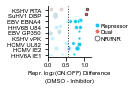

In [319]:
import random
from matplotlib.lines import Line2D

R_DMSO_avg = Rep_DMSO[['Tile ID', 'Protein', 'Protein Sequence', 'Avg', 'Effect', 'Type', 'Virus Abbreviation']].rename(columns={'Avg':'DMSO'})
R_taz_avg = Rep_taz[['Tile ID', 'Avg']].rename(columns={'Avg':'tazemetostat'})
plot_df = pd.merge(R_DMSO_avg, R_taz_avg, on='Tile ID', how='inner')
plot_df['UniProt ID'] = plot_df['Tile ID'].str.split('_').str[0]
plot_df['Diff'] = plot_df['DMSO'] - plot_df['tazemetostat']
plot_df['anyNR'] = np.where(plot_df['Protein Sequence'].str.contains('[^P][VLIWF][^P][^P][VLIFY][VLIF][^P]'), 1, 0)

plot_df = plot_df[plot_df['Effect']!='-']
plot_df = plot_df[plot_df['Type']=='HHV tile']
eff_scores = list(plot_df[plot_df['Effect'].str.contains('activator')]['Diff'])
eff_mean = np.mean(eff_scores)
eff_std = np.std(eff_scores)
upperlimtaz = eff_mean + 2*eff_std
lowerlim = eff_mean - 2*eff_std
print('Number of hit tiles sensitive to inhibition:', len(plot_df[plot_df['Diff']>upperlimtaz]))
# dfR_taz = plot_df[plot_df['Diff']>upperlimtaz]
dfR_taz = plot_df[plot_df['DMSO']>threshR_DMSO]

# plot_df = plot_df[plot_df['Effect']!='repressor']
plot_df = plot_df[plot_df['DMSO']>threshR_DMSO]
plot_df['Effect'] = pd.Categorical(plot_df['Effect'], categories=['activator', 'repressor', 'dual'], ordered=True)

tokeep = list(set(list(plot_df[plot_df['Diff']>upperlimtaz]['UniProt ID'])))
plot_df = plot_df[plot_df['UniProt ID'].isin(tokeep)]
plot_df = plot_df.sort_values(by=['Diff'], ascending=False)
plot_df['ID'] = plot_df['Protein'] + ' ' + plot_df['UniProt ID']
plot_df['ID2'] = plot_df['Virus Abbreviation'] + ' ' + plot_df['Protein']

tokeep2 = plot_df[['UniProt ID', 'Diff']].groupby('UniProt ID', sort=False).sum().reset_index().drop_duplicates(subset='UniProt ID')
print('Number of proteins with hit tiles sensitive to inhibition:', len(tokeep2))
tokeep2 = list(tokeep2['UniProt ID'])[:10]

plot_df = plot_df[plot_df['UniProt ID'].isin(tokeep2)]

tile = list(plot_df['Tile ID'])
xpos = list(plot_df['Diff'])
ypos = list(plot_df['ID2'])
size = list(plot_df['DMSO'])
size = [((s+min(size))/(max(size)+min(size))+1.5)*2 for s in size]
effect = list(plot_df['Effect'])
anyNR = list(plot_df['anyNR'])

colorDict = {'activator':'#E3B919', 'dual':'#EA7063', 'repressor':'#1BC6EE'}
# tiles = ['P06492_041', 'P03209_052', 'Q2HRC9_015', 'Q2HR71_017', 'F5HCV3_054', 'Q2HRD3_107']

plt.figure(figsize=(1.4, 1.3))
y2i = {}
i2y = {}
i = 0
for t, x, y, s, e, a in zip(tile, xpos, ypos, size, effect, anyNR):
    if a == 1:
        edgecolor = 'black'
#     if t in tiles:
#         edgecolor = 'black'
        zorder=5
    else:
        edgecolor = 'white'
        zorder=0
    if y not in y2i:
        y2i[y] = i
        i2y[i] = y
        plt.plot(x, i+random.randrange(-1, 1)/5, marker='o', markersize=s, mfc=colorDict[e], color=edgecolor, mew=0.5, zorder=zorder)
        i += 1
    else:
        plt.plot(x, y2i[y]+random.randrange(-1, 1)/5, marker='o', markersize=s, mfc=colorDict[e], color=edgecolor, mew=0.5)

plt.yticks(ticks=range(len(y2i)), labels=list(y2i.keys()))
plt.gca().invert_yaxis()

plt.axvspan(xmin=0.025, xmax=upperlimtaz,
            ymin=plt.gca().get_ylim()[1]+0.63,
            ymax=plt.gca().get_ylim()[0],
            color='white', alpha=0.75, zorder=10)
# plt.ylim(plt.gca().get_ylim()[0]-0.5, plt.gca().get_ylim()[1]+0.5)
plt.yticks(fontsize=6)
plt.xlim(eff_mean, plt.gca().get_xlim()[1])
plt.xticks([0, 0.5, 1], fontsize=6)
plt.gca().tick_params(axis='x', pad=1.5)
# plt.axvline(x=eff_mean, color='#333333', ls='--', lw=1, zorder=15)
# plt.axvline(x=lowerlim, color='#333333', ls=':', lw=1, zorder=15)
plt.axvline(x=upperlimtaz, color='#333333', ls=':', lw=1, zorder=15)
plt.xlabel('Repr. log$_2$(ON:OFF) Difference\n(DMSO - Inhibitor)', fontsize=6, labelpad=0.5)
# plt.title('EZH2 Inhibition', fontsize=8, pad=2.5)
sns.despine()

legend_elements = [Line2D([0], [0], marker='o', color='#FFFFFF', label='Repressor',
                          markerfacecolor=colorDict['repressor'], markersize=5),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='Dual',
                          markerfacecolor=colorDict['dual'], markersize=5),
                   Line2D([0], [0], marker='o', color='k', label='NR/fNR',
                          markerfacecolor='white', markersize=5, mew=0.5)]
#                    Line2D([0], [0], marker='o', color='k', label='Validated',
#                           markerfacecolor='white', markersize=5, mew=0.5)]

plt.tight_layout()
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
           frameon=False, ncol=1, handlelength=0.2, handletextpad=0.5, labelspacing=0.2, fontsize=6)

plt.savefig('../Individual Figure Panels/Figure 5/HHV_Activation_difference_EZH2_inhibition_vs_DMSO.png', dpi=1200, bbox_inches='tight')

#### EZH2 inhibition with tazemetostat - plot tiles from top 10 most sensitive proteins as featured in Fig. 5M

Number of hit tiles sensitive to inhibition: 136
Number of hit tiles sensitive to inhibition with NR or flexiNR box: 86
Number of proteins with hit tiles sensitive to inhibition: 83


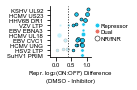

In [327]:
import random
from matplotlib.lines import Line2D

R_DMSO_avg = Rep_DMSO[['Tile ID', 'Protein', 'Protein Sequence', 'Avg', 'Effect', 'Type', 'Virus Abbreviation']].rename(columns={'Avg':'DMSO'})
R_TMP_avg = Rep_TMP[['Tile ID', 'Avg']].rename(columns={'Avg':'TMP269'})
plot_df = pd.merge(R_DMSO_avg, R_TMP_avg, on='Tile ID', how='inner')
plot_df['UniProt ID'] = plot_df['Tile ID'].str.split('_').str[0]
plot_df['Diff'] = plot_df['DMSO'] - plot_df['TMP269']
plot_df['anyNR'] = np.where(plot_df['Protein Sequence'].str.contains('[^P][VLIWF][^P][^P][VLIFY][VLIF][^P]'), 1, 0)

plot_df = plot_df[plot_df['Effect']!='-']
plot_df = plot_df[plot_df['Type']=='HHV tile']
eff_scores = list(plot_df[plot_df['Effect'].str.contains('activator')]['Diff'])
eff_mean = np.mean(eff_scores)
eff_std = np.std(eff_scores)
upperlimTMP = eff_mean + 2*eff_std
lowerlim = eff_mean - 2*eff_std
print('Number of hit tiles sensitive to inhibition:', len(plot_df[plot_df['Diff']>upperlimTMP]))
print('Number of hit tiles sensitive to inhibition with NR or flexiNR box:', len(plot_df[(plot_df['Diff']>upperlimTMP) & (plot_df['anyNR']==1)]))
# dfR_TMP = plot_df[plot_df['Diff']>upperlimTMP]
dfR_TMP = plot_df[plot_df['DMSO']>threshR_DMSO]

# plot_df = plot_df[plot_df['Effect']!='repressor']
plot_df = plot_df[plot_df['DMSO']>threshR_DMSO]
plot_df['Effect'] = pd.Categorical(plot_df['Effect'], categories=['activator', 'repressor', 'dual'], ordered=True)

tokeep = list(set(list(plot_df[plot_df['Diff']>upperlimTMP]['UniProt ID'])))
plot_df = plot_df[plot_df['UniProt ID'].isin(tokeep)]
plot_df = plot_df.sort_values(by=['Diff'], ascending=False)
plot_df['ID'] = plot_df['Protein'] + ' ' + plot_df['UniProt ID']
plot_df['ID2'] = plot_df['Virus Abbreviation'] + ' ' + plot_df['Protein']
plot_df = plot_df[plot_df['Effect']!='activator']

tokeep2 = plot_df[['UniProt ID', 'Diff']].groupby('UniProt ID', sort=False).sum().reset_index().drop_duplicates(subset='UniProt ID')
print('Number of proteins with hit tiles sensitive to inhibition:', len(tokeep2))
tokeep2 = list(tokeep2['UniProt ID'])[:10]

plot_df = plot_df[plot_df['UniProt ID'].isin(tokeep2)]

tile = list(plot_df['Tile ID'])
xpos = list(plot_df['Diff'])
ypos = list(plot_df['ID2'])
size = list(plot_df['DMSO'])
size = [((s+min(size))/(max(size)+min(size))+1.5)*2 for s in size]
effect = list(plot_df['Effect'])
anyNR = list(plot_df['anyNR'])

colorDict = {'activator':'#E3B919', 'dual':'#EA7063', 'repressor':'#1BC6EE'}
# tiles = ['P06492_041', 'P03209_052', 'Q2HRC9_015', 'Q2HR71_017', 'F5HCV3_054', 'Q2HRD3_107']

plt.figure(figsize=(1.4, 1.3))
y2i = {}
i2y = {}
i = 0
for t, x, y, s, e, a in zip(tile, xpos, ypos, size, effect, anyNR):
    if a == 1:
        edgecolor = 'black'
#     if t in tiles:
#         edgecolor = 'black'
        zorder=5
    else:
        edgecolor = 'white'
        zorder=0
    if y not in y2i:
        y2i[y] = i
        i2y[i] = y
        plt.plot(x, i+random.randrange(-1, 1)/5, marker='o', markersize=s, mfc=colorDict[e], color=edgecolor, mew=0.5, zorder=zorder)
        i += 1
    else:
        plt.plot(x, y2i[y]+random.randrange(-1, 1)/5, marker='o', markersize=s, mfc=colorDict[e], color=edgecolor, mew=0.5)

plt.yticks(ticks=range(len(y2i)), labels=list(y2i.keys()))
plt.gca().invert_yaxis()

plt.axvspan(xmin=-0.13, xmax=upperlimTMP,
            ymin=plt.gca().get_ylim()[1]+0.485,
            ymax=plt.gca().get_ylim()[0],
            color='white', alpha=0.75, zorder=10)
# plt.ylim(plt.gca().get_ylim()[0]-0.5, plt.gca().get_ylim()[1]+0.5)
plt.yticks(fontsize=6)
plt.xlim(eff_mean, plt.gca().get_xlim()[1])
plt.xticks([0, 0.5, 1], fontsize=6)
plt.gca().tick_params(axis='x', pad=1.5)
# plt.axvline(x=eff_mean, color='#333333', ls='--', lw=1, zorder=15)
# plt.axvline(x=lowerlim, color='#333333', ls=':', lw=1, zorder=15)
plt.axvline(x=upperlimTMP, color='#333333', ls=':', lw=1, zorder=15)
plt.xlabel('Repr. log$_2$(ON:OFF) Difference\n(DMSO - Inhibitor)', fontsize=6, labelpad=0.5)
# plt.title('EZH2 Inhibition', fontsize=8, pad=2.5)
sns.despine()

legend_elements = [Line2D([0], [0], marker='o', color='#FFFFFF', label='Repressor',
                          markerfacecolor=colorDict['repressor'], markersize=5),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='Dual',
                          markerfacecolor=colorDict['dual'], markersize=5),
                   Line2D([0], [0], marker='o', color='k', label='NR/fNR',
                          markerfacecolor='white', markersize=5, mew=0.5)]
#                    Line2D([0], [0], marker='o', color='k', label='Validated',
#                           markerfacecolor='white', markersize=5, mew=0.5)]

plt.tight_layout()
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
           frameon=False, ncol=1, handlelength=0.2, handletextpad=0.5, labelspacing=0.2, fontsize=6)

plt.savefig('../Individual Figure Panels/Figure 5/HHV_Activation_difference_HDACIIa_inhibition_vs_DMSO.png', dpi=1200, bbox_inches='tight')

### Chemical validations

In [321]:
df = pd.read_csv('../Flow Single-Cell Data - CSV/HHVhits_chem-inhib_Screen_validations_single-cell.csv')
df = df[(df['P1']==True) & (df['P2']==True) & (df['mCherry']==True)]
df = df.rename(columns={'Citrine':'Citrine_Act'})
df['Citrine_Rep'] = np.where(df['mCitrine-A']>1e7, True, False)
df.loc[df['Protein'].isna(), 'Protein'] = 'empty' 
df = df.replace(to_replace='taz', value='tazemetostat')

aggdf = df.groupby(by=['Reporter', 'Condition', 'Treatment', 'Construct', 'Protein', 'Replicate', 'Time'], as_index=False).mean()
aggdf = aggdf.replace(to_replace='taz', value='tazemetostat')

key = pd.read_csv('../Flow Single-Cell Data - CSV/HHV-chem-inhib_validations_key.csv')

print('Complete')

Complete


In [323]:
constructDict = {'CL144':['Human', 'MYBA', '', ''],
                 'JT151':['Human', 'KRAB', '', ''],
                 'JT126':['', 'empty', '', '']}

info = pd.read_csv('../Supplemental Tables - CSV/HHV-chemical-inhibition/HHVhits_added-info.csv')
infoA = info.drop(columns='Repression').rename(columns={'Activation':'Avg'})
infoA['Screen'] = 'Activation'
infoR = info.drop(columns='Activation').rename(columns={'Repression':'Avg'})
infoR['Screen'] = 'Repression'
info = pd.concat([infoA, infoR])

key = pd.read_csv('../Flow Single-Cell Data - CSV/HHV-chem-inhib_validations_key.csv')
key = key[['Construct', 'Tile_ID']].rename(columns={'Tile_ID':'Tile ID'})
key = pd.merge(key, info, on='Tile ID', how='left')

for i in constructDict:
    key.loc[key['Construct']==i, 'Virus Abbreviation'] = constructDict[i][0]
    key.loc[key['Construct']==i, 'Protein'] = constructDict[i][1]
    key.loc[key['Construct']==i, 'Tile Start'] = constructDict[i][2]
    key.loc[key['Construct']==i, 'Tile End'] = constructDict[i][3]

aggdfA = aggdf[aggdf['Reporter']=='DY032']
aggdfA = aggdfA[['Construct', 'Condition', 'Treatment', 'Replicate', 'Citrine_Act']]
aggdfA['Citrine OFF'] = 1 - aggdfA['Citrine_Act']  

normdf = aggdfA[aggdfA['Condition']=='dox']
normdf['Citrine ON'] = normdf['Citrine_Act']*100
normdf = normdf.groupby(by=['Construct', 'Treatment'])['Citrine ON'].agg(['mean', 'std']).reset_index()
normdf = normdf.rename(columns={'mean':'Citrine ON', 'std':'ON std'})
keyA = pd.merge(key[key['Screen']=='Activation'], normdf, on='Construct', how='left').drop_duplicates(subset=['Treatment', 'Tile ID', 'Screen'])

aggdfR = aggdf[aggdf['Reporter']=='JT039']
aggdfR = aggdfR[['Construct', 'Condition', 'Treatment', 'Replicate', 'Citrine_Rep']]
aggdfR['Citrine OFF'] = 1 - aggdfR['Citrine_Rep']

normdf = aggdfR[aggdfR['Condition']=='dox']
normdf['Citrine OFF'] = normdf['Citrine OFF']*100
normdf = normdf.groupby(by=['Construct', 'Treatment'])['Citrine OFF'].agg(['mean', 'std']).reset_index()
normdf = normdf.rename(columns={'mean':'Citrine OFF', 'std':'OFF std'})

keyR = pd.merge(key[key['Screen']=='Repression'], normdf, on='Construct', how='left').drop_duplicates(subset=['Treatment', 'Tile ID', 'Screen'])
print('Complete')

Complete


<ipython-input-323-289131fd7652>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normdf['Citrine ON'] = normdf['Citrine_Act']*100
<ipython-input-323-289131fd7652>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normdf['Citrine OFF'] = normdf['Citrine OFF']*100


#### All validation flow cytometry distributions (not featured in a figure panel)

In [325]:
font = {'size':8,
        'family':'Arial'}
matplotlib.rc('font', **font)

def plot_validations_subset(df, screentype, key, protein):
    if screentype == 'Activation':
        reporter = 'DY032'
        color = '#F3CE48'
        yvar = 'Citrine ON'
        opposite = 'Repression'
        cutoff = 3e6
    elif screentype == 'Repression':
        reporter = 'JT039'
        color = '#23BEDB'
        yvar = 'Citrine OFF'
        opposite = 'Activation'
        cutoff = 1e7
    
    df = df[(df['Reporter']==reporter) & (df['Protein']==protein)]
    df['mCitrine'] = np.log10(df['mCitrine-A'])
    df = df.drop(columns='Protein')
    df = pd.merge(df, key[['Construct', 'Treatment', 'Avg', 'Virus Abbreviation', 'Protein', 'Tile Start', 'Tile End', yvar, 'Screen']], how='left', on=['Construct', 'Treatment'])
    df.loc[df['Avg'].isna(), 'Avg'] = -10
    df['Condition'] = pd.Categorical(df['Condition'], categories=['nodox', 'dox'], ordered=True)
    df = df.sort_values(by=['Avg', 'Condition', 'Replicate'], ascending=[False, True, True])
    df['Condition-Replicate'] = df['Condition'].astype(str) + '-' + df['Replicate']
    
    labeldf = df[df['Screen']!=opposite].sort_values(by=['Avg'], ascending=False)
    labeldf = labeldf[['Construct', 'Virus Abbreviation', 'Protein', 'Treatment', 'Tile Start', 'Tile End', yvar, 'Avg']].drop_duplicates(subset=['Construct', 'Treatment'])
    labeldf['Tile Start'] = np.where(labeldf['Tile Start']=='', labeldf['Tile Start'], labeldf['Tile Start'].astype(str).str.split('.').str[0])
    labeldf['Tile End'] = np.where(labeldf['Tile End']=='', labeldf['Tile End'], labeldf['Tile End'].astype(str).str.split('.').str[0])
    labeldf['Sample'] = np.where(labeldf['Tile Start']=='', labeldf['Virus Abbreviation'] + ' ' + labeldf['Protein'],
                             labeldf['Virus Abbreviation'] + ' ' + labeldf['Protein'] + '\n[' \
                             + labeldf['Tile Start'] + '-' + labeldf['Tile End'] + ']\n' + labeldf['Treatment'])
    labeldf['Construct-Treatment'] = labeldf['Construct'] + '_' + labeldf['Treatment']

    df['Construct-Treatment'] = df['Construct'] + '_' + df['Treatment']
    samples = dict(zip(list(labeldf['Construct-Treatment']), list(labeldf['Sample'])))
    df['Sample'] = df['Construct-Treatment'].map(samples)
    txorder = list(set(list(df['Treatment'])))
    txorder.sort(reverse=True)
    txorder = ['DMSO'] + [t for t in txorder if t != 'DMSO']
    df['Treatment'] = pd.Categorical(df['Treatment'], categories=txorder, ordered=True)
    df = df.sort_values(by='Treatment')
    labeldf['Treatment'] = pd.Categorical(labeldf['Treatment'], categories=txorder, ordered=True)
    labeldf = labeldf.sort_values(by='Treatment')
    df = df[df['Screen']!=opposite].sort_values(by=['Construct', 'Condition', 'Replicate'])
    
    if screentype == 'Activation':
        ON = list(labeldf[yvar])
        ON = [round(on, 1) for on in ON]
        OFF = [str(round(100-on, 1)) + '%' for on in ON]
        ON = [str(on) + '%' for on in ON]
        
    elif screentype == 'Repression':
        OFF = list(labeldf[yvar])
        OFF = [round(off, 1) for off in OFF]
        ON = [str(round(100-off, 1)) + '%' for off in OFF]
        OFF = [str(off) + '%' for off in OFF]
        
    pal = sns.color_palette(['#999999', '#999999', color, color])
    if len(df) == 0:
        return None
    
    g = sns.FacetGrid(data=df, row='Sample',
                      hue='Condition-Replicate', palette=pal,
                      aspect=1, height=1.25)
    g.map(sns.kdeplot, 'mCitrine', fill=True, bw_adjust=0.2)
    g.map(plt.axvline, x=np.log10(cutoff), ls=':', color='#333333', lw=1)
    g.set_titles(template='{row_name}')
    plt.xlim([4.5,9.5])
    plt.ylim([0,4])
    plt.xticks([5, 6, 7, 8, 9], ['10$^5$', '10$^6$', '10$^7$', '10$^8$', '10$^9$'])
    for ax, on, off in zip(g.axes.flat, ON, OFF):
        ax.text(0.05, 0.95, off, transform=ax.transAxes, ha='left', va='top')
        ax.text(0.95, 0.95, on, transform=ax.transAxes, ha='right', va='top')
        ax.grid(False)
    plt.tight_layout()
    plt.savefig('../Individual Figure Panels/Figure S5/chem-inhib_subsets/HHVhits_chem-inhib_%s_%s_subset_validations_kdeplot.png' % (screentype, '-'.join(protein.split(' '))), dpi=1200)
    plt.close()

keyA2 = keyA.copy()
keyA2['Protein'] = keyA2['Virus Abbreviation'] + ' ' + keyA2['Protein']
protA = set(keyA2['Protein'])
for a in protA:
    print(a)
    plot_validations_subset(df, 'Activation', keyA, a)

keyR2 = keyR.copy()
keyR2['Protein'] = keyR2['Virus Abbreviation'] + ' ' + keyR2['Protein']
protR = set(keyR2['Protein'])
for r in protR:
    print(r)
    plot_validations_subset(df, 'Repression', keyR, r)
print('Complete')

HHV7 U8
EBV RTA


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


EBV EBNA4
HSV1 VP16


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


KSHV DBP


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


HCMV RL5A
KSHV KbZIP
KSHV ORF10


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


HCMV IE2
KSHV RTA


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


KSHV VIRF2


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


HHV7 U84
HHV7 U8


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


EBV RTA
EBV EBNA4


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


HSV1 VP16
KSHV DBP
HCMV RL5A


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


KSHV KbZIP


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


KSHV ORF10
HCMV IE2


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


KSHV RTA
KSHV VIRF2


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


HHV7 U84


<ipython-input-325-304524499c81>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mCitrine'] = np.log10(df['mCitrine-A'])


Complete


### END

In [16]:
# get dataframe with screen hits, their scores in each screen, and other important information; drop duplicates
allTiles = pd.read_csv('Screen_Files/HHV/HHV_ActivD2-ReprD5_detailed.csv')
allTiles = allTiles[['Tile ID', 'Tile Start', 'Tile End', 'Virus Abbreviation', 'Protein', 'Tile Sequence', 'DNA Sequence', 'Avg', 'Hit', 'Screen']]

allTilesAct = allTiles[allTiles['Screen']=='Activation'].rename(columns={'Avg':'Activation'}).drop(columns=['Screen'])
allTilesRep = allTiles[allTiles['Screen']=='Repression'].rename(columns={'Avg':'Repression'}).drop(columns=['Screen'])
allTiles = pd.merge(allTilesAct, allTilesRep, on=['Tile ID', 'Tile Start', 'Tile End', 'Virus Abbreviation', 'Protein', 'Tile Sequence', 'DNA Sequence'], how='outer')

# as of now, keeping fiducial, immune, and random controls
hitTiles = allTiles[(allTiles['Hit_x']==1)|(allTiles['Hit_y']==1)].drop(columns=['Hit_x','Hit_y']).drop_duplicates(subset='DNA Sequence')
hitTiles['Control'] = np.where(hitTiles['Tile ID'].str.contains('random'), 'random control', 'HHV tile')
hitTiles['Control'] = np.where(hitTiles['Tile ID'].str.contains('fiducial'), 'fiducial control', hitTiles['Control'])
# sns.scatterplot(data=hitTiles, y='Activation', x='Repression', hue='Control', palette='Set1')
# print('Number of tiles in library:', len(hitTiles))
hitTiles.to_csv('Screen_Files/HHV/HHV_ActivD2-ReprD5_Hits.csv', index=False)
hitTiles

,Tile ID,Tile Start,Tile End,Virus Abbreviation,Protein,Tile Sequence,DNA Sequence,Activation,Repression,Control
0,F5HCV3_058,571.0,650.0,KSHV,RTA,SEAQPPLLSLPPPLDVDQSLFALLDEAGPETWDVGSPLSPTDDALL...,AGCGAGGCTCAGCCACCCCTTCTGTCTTTGCCCCCTCCTCTGGATG...,10.916126,1.344783,HHV tile
1,F5HCV3_057,561.0,640.0,KSHV,RTA,ATDVATSEGPSEAQPPLLSLPPPLDVDQSLFALLDEAGPETWDVGS...,GCGACAGACGTTGCCACTAGCGAGGGCCCAAGCGAAGCCCAACCCC...,10.870221,1.734280,HHV tile
2,F5HCV3_059,581.0,660.0,KSHV,RTA,PPPLDVDQSLFALLDEAGPETWDVGSPLSPTDDALLSSILQGLYQL...,CCACCCCCTCTGGATGTCGATCAGTCACTGTTCGCCCTCTTGGATG...,10.586600,0.868291,HHV tile
3,F5HCV3_056,551.0,630.0,KSHV,RTA,GSITTPQDVHATDVATSEGPSEAQPPLLSLPPPLDVDQSLFALLDE...,GGCTCTATTACAACTCCTCAGGACGTGCACGCAACCGATGTGGCTA...,10.529233,2.036393,HHV tile
4,Q2HR71_031,301.0,380.0,KSHV,VIRF2,SHVSGLDDCLPMVDHIEGCLLDLLSDVGQELPDLGDLGELLCETAS...,AGCCATGTGTCCGGACTTGATGACTGCCTCCCGATGGTAGACCACA...,10.396640,2.661039,HHV tile
...,...,...,...,...,...,...,...,...,...,...
40319,P52538_056,551.0,630.0,HHV6A,DBP,CKKNSLIDPVTGEDTFNVRSKKDFVSIIHGLTQCIEECVSRCIVEM...,TGCAAAAAGAACTCTCTGATCGATCCGGTCACAGGCGAGGACACAT...,NaN,0.781627,HHV tile
40320,P03188_007,61.0,140.0,EBV,gB,RFSSDIQCPSFGTRENHTEGLLMVFKDNIIPYSFKVRSYTKIVTNI...,AGGTTTAGCAGTGACATCCAGTGCCCTTCTTTCGGGACACGGGAAA...,NaN,0.764671,HHV tile
40321,P52538_013,121.0,200.0,HHV6B,DBP,EVPTARKVIDIKALCSAVGKDADSVICHVACGNGFKELLFAGLLIP...,GAGGTCCCTACTGCCAGGAAGGTGATCGACATTAAGGCGCTCTGCT...,NaN,0.756696,HHV tile
40322,P36320_030,291.0,370.0,HHV6A,gB,MLKHWTTVTHGLRAETDETYHFISKELTAAFVASKESLNLTDPKQT...,ATGCTTAAGCACTGGACAACTGTCACTCATGGCCTCAGGGCTGAGA...,NaN,0.741871,HHV tile


In [ ]:
# prepare perturbation library of strongest tiles within domains
# read in domain csv and use tile info above to identify strongest tile in each domain

def maxTile(tileDF, domainDF, screentype):
    uIDList = list(domainDF['UniProt ID'])
    startList = list(domainDF['Start'])
    endList = list(domainDF['End'])
    tempdfList = []
    for i in range(len(uIDList)):
        tempdf = tileDF[tileDF['Tile ID'].str.contains(uIDList[i])]
        tempdf = tempdf[(tempdf['Tile Start']>=startList[i]) & (tempdf['Tile End']<=endList[i])]
        maxscore = max(list(tempdf[screentype]))
        tempdf = tempdf[tempdf[screentype]==maxscore]
        tempdfList.append(tempdf)
    return pd.concat(tempdfList)

doms = pd.read_csv('../Manuscript_Figures/Screen_Files/HHV/HHV_domains.csv')
domsA = doms[doms['Effect']=='Activation']
domsR = doms[doms['Effect']=='Repression']

maxAct = maxTile(hitTiles, domAct, 'Activation')
maxRep = maxTile(hitTiles, domRep, 'Repression')

maxTiles = pd.concat([maxAct, maxRep]).drop_duplicates(subset='Tile ID').reset_index().drop(columns='index')
maxTiles

In [ ]:
maxTilesFiltered = maxTiles[(maxTiles['Activation']>=5.29) | (maxTiles['Repression']>=1.98)]
maxTilesFiltered.to_csv('HHV-perturb_max-tiles.csv', index=False)
maxTilesFiltered

In [ ]:
# prepare perturbation library of strongest tiles within domains
# read in domain csv and use tile info above to identify strongest tile in each domain


def maxTile(tileDF, domainDF, screentype):
    uIDList = list(domainDF['UniProt ID'])
    startList = list(domainDF['Start'])
    endList = list(domainDF['End'])
    tempdfList = []
    for i in range(len(uIDList)):
        tempdf = tileDF[tileDF['Tile ID'].str.contains(uIDList[i])]
        tempdf = tempdf[(tempdf['Tile Start']>=startList[i]) & (tempdf['Tile End']<=endList[i])]
        maxscore = max(list(tempdf[screentype]))
        tempdf = tempdf[tempdf[screentype]==maxscore]
        tempdfList.append(tempdf)
    return pd.concat(tempdfList)

domAct = pd.read_csv('../Manuscript_Figures/Screen_CSV_Files/HHV/HHV_Act_domain_sequences.csv')
domRep = pd.read_csv('../Manuscript_Figures/Screen_CSV_Files/HHV/HHV_Rep_domain_sequences.csv')

maxAct = maxTile(hitTiles, domAct, 'Activation')
maxRep = maxTile(hitTiles, domRep, 'Repression')

maxTiles = pd.concat([maxAct, maxRep]).drop_duplicates(subset='Tile ID').reset_index().drop(columns='index')
maxTiles

In [86]:

# def motif_search(df, effect):
#     if effect == 'Activation':
#         sigma = WT_A
#         df = df[(df['Effect'].isin(['activator', 'dual'])) & (df['Tile ID']!='-')]
#     else:
#         sigma = WT_R
#         df = df[(df['Effect'].isin('repressor')) & (df['Tile ID']!='-')]
#     tilelist = list(set(list(df['Tile ID'])))
#     newtilelist = []
#     newavglist = []
#     newposlist = []
#     newpertlist = []
#     catlist = []
#     mnamelist = []
#     mseqlist = []
#     mstartlist = []
#     mendlist = []
#     overlaps = []
#     for tile in tilelist:
#         tempdf = df[df['Tile ID']==tile]
        
#         WTscore = list(tempdf.loc[tempdf['Type']=='WT', 'Avg'])[0]
#         WTupper = WTscore + 2*sigma
#         WTlower = WTscore - 2*sigma
# #         WTseq = list(tempdf.loc[tempdf['Type']=='WT', 'Protein Sequence'])[0]
#         WTstart = list(tempdf.loc[tempdf['Type']=='WT', 'Tile Start'])[0]
#         WTend = list(tempdf.loc[tempdf['Type']=='WT', 'Tile End'])[0]
        
#         avglist = list(tempdf['Avg'])
#         hitlist = list(tempdf['Hit'])
#         seqlist = list(tempdf['Protein Sequence'])
#         poslist = list(tempdf['Position'])
#         pertlist = list(tempdf['Perturbation'])
        
#         newavglist.extend(avglist)
#         newposlist.extend(poslist)
#         newpertlist.extend(pertlist)
        
#         for a, h in zip(avglist, hitlist):
#             newtilelist.append(tile)
#             if h == 0:
#                 catlist.append('breaking')
#             else:
#                 if a < WTlower:
#                     catlist.append('reducing')
#                 elif (a >= WTlower) & (a <= WTupper):
#                     catlist.append('no effect')
#                 elif a > WTupper:
#                     catlist.append('enhancing')
        
#         for q, po, pe in zip(seqlist, poslist, pertlist):
#             tempmname = []
#             tempmseq = []
#             tempmstart = []
#             tempmend = []
#             tempoverlap = []
#             if pe == '-':
#                 po = 0
#             else:
#                 po = int(po)
#             for m in motifs:          
#                 matches = re.findall(motifs[m], q)
#                 if len(matches) != 0:
#                     for i in matches:
#                         if type(i) == tuple:
#                             for ii in i:
#                                 if len(ii) != 0:
#                                     i = ii
#                         i_start = re.search(i, q).start()
#                         i_start += WTstart
#                         i_end = i_start + len(i) - 1
#                         tempmname.append(m)
#                         tempmseq.append(i)
#                         tempmstart.append(str(int(i_start)))
#                         tempmend.append(str(int(i_end)))
#                         if pe == 'del5':
#                             if (i_end < po) | (i_start > po + 4):
#                                 tempoverlap.append('0')
#                             else:
#                                 tempoverlap.append('1')
#                         elif pe == '-':
#                             tempoverlap.append('0')
#                         else:
#                             if (po >= i_start) & (po <= i_end):
#                                 tempoverlap.append('1')
#                             else:
#                                 tempoverlap.append('0')
                
#             mnamelist.append(';'.join(tempmname))
#             mseqlist.append(';'.join(tempmseq))
#             mstartlist.append(';'.join(tempmstart))
#             mendlist.append(';'.join(tempmend))
#             overlaps.append(';'.join(tempoverlap))
            
#     df2 = pd.DataFrame({'Tile ID':newtilelist, 'Avg':newavglist, 'Position':newposlist, 'Perturbation':newpertlist,
#                         'Mutation Effect':catlist, 'Motif Name':mnamelist, 'Motif Sequence':mseqlist, 'Motif Start':mstartlist,
#                         'Motif End':mendlist, 'Motif Overlaps Mutation?':overlaps})
    
#     df = pd.merge(df, df2, on=['Tile ID', 'Avg', 'Position', 'Perturbation'], how='outer')
#     return df
    

# dfout = motif_search(Act, 'Activation')

# dfout[dfout['Oligo ID'].str.contains('F5HCV3')]  #[dfout['Type']=='WT']

,Oligo ID,R1,countsOFF_R1,countsON_R1,R2,countsOFF_R2,countsON_R2,Avg,Standard Error,countsSUM_R1,...,Tile End,Protein,Virus Abbreviation,Effect,Mutation Effect,Motif Name,Motif Sequence,Motif Start,Motif End,Motif Overlaps Mutation?
0,HHV-DMS_F5HCV3_058_A646del5,4.585678,1003.0,24748.0,4.366438,1146.0,24195.0,4.476058,0.109620,25751.0,...,650.0,RTA,KSHV,activator,no effect,SUMO_SIM_par;LIG_NRBOX;pseudo_NRBOX,PPLDVD;SLFALLD;LLSSILQ,582;589;615,587;595;621,0;0;0
1,HHV-DMS_F5HCV3_058_D585A,3.980685,382.0,6197.0,4.275829,307.0,6087.0,4.128257,0.147572,6579.0,...,650.0,RTA,KSHV,activator,reducing,SUMO_SIM_par;LIG_NRBOX;pseudo_NRBOX,PPLAVD;SLFALLD;LLSSILQ,582;589;615,587;595;621,1;0;0
2,HHV-DMS_F5HCV3_058_D585N,4.138765,455.0,8236.0,4.275625,399.0,7910.0,4.207195,0.068430,8691.0,...,650.0,RTA,KSHV,activator,no effect,LIG_NRBOX;pseudo_NRBOX,SLFALLD;LLSSILQ,589;615,595;621,0;0
3,HHV-DMS_F5HCV3_058_D587A,2.699353,620.0,4138.0,2.672658,610.0,3981.0,2.686006,0.013348,4758.0,...,650.0,RTA,KSHV,activator,reducing,LIG_NRBOX;pseudo_NRBOX,SLFALLD;LLSSILQ,589;615,595;621,0;0
4,HHV-DMS_F5HCV3_058_D587N,3.490822,828.0,9565.0,3.707401,626.0,8370.0,3.599112,0.108290,10393.0,...,650.0,RTA,KSHV,activator,reducing,LIG_NRBOX;pseudo_NRBOX,SLFALLD;LLSSILQ,589;615,595;621,0;0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,HHV-DMS_F5HCV3_060_W602A,3.676455,398.0,5229.0,3.726875,411.0,5570.0,3.701665,0.025210,5627.0,...,670.0,RTA,KSHV,activator,no effect,pseudo_NRBOX;USP7_MATH_1,LLSSILQ;PSPSG,615;649,621;653,0;0
156,HHV-DMS_F5HCV3_060_WT,3.752148,318.0,4403.0,3.745134,309.0,4241.0,3.748641,0.003507,4721.0,...,670.0,RTA,KSHV,activator,no effect,pseudo_NRBOX;USP7_MATH_1,LLSSILQ;PSPSG,615;649,621;653,0;0
157,HHV-DMS_F5HCV3_060_Y624A,3.302034,400.0,4054.0,4.069420,304.0,5224.0,3.685727,0.383693,4454.0,...,670.0,RTA,KSHV,activator,no effect,pseudo_NRBOX;USP7_MATH_1,LLSSILQ;PSPSG,615;649,621;653,0;0
158,HHV-DMS_F5HCV3_060_Y656A,2.892908,419.0,3198.0,2.964521,478.0,3819.0,2.928714,0.035806,3617.0,...,670.0,RTA,KSHV,activator,reducing,pseudo_NRBOX;USP7_MATH_1,LLSSILQ;PSPSG,615;649,621;653,0;0


In [ ]:
# import re

# def motif_search(tilelist, seqlist, effect, coordlist=[]):
#     if len(coordlist) != 0:
#         df = pd.DataFrame({'Protein ID':[u.split('_')[0] for u in tilelist],
#                            'Essential Sequence':seqlist,
#                            'Ext Start':coordlist[0],
#                            'Ext End':coordlist[1],
#                            'Start':coordlist[2],
#                            'End':coordlist[3]})
#         numcols = 6
#         for m in motifs:
#             motifcounts = []
#             for t, q, es, ee, s, e in zip(tilelist, list(df['Essential Sequence']), list(df['Ext Start']),
#                                           list(df['Ext End']), list(df['Start']), list(df['End'])):
#                 matches = re.findall(motifs[m], q)
#                 counter = 0
#                 if len(matches) != 0:
#                     for i in matches:
#                         if type(i) == tuple:
#                             for ii in i:
#                                 if len(ii) != 0:
#                                     i = ii
#                         i_start = re.search(i, q).start()
#                         i_start += es
#                         i_end = i_start + len(i) - 1
#                         if (i_end < s) | (i_start > e):
#                             continue
#                         else:
#                             counter += 1
#                 motifcounts.append(counter)
#             df[m] = motifcounts
    
#     else:
#         df = pd.DataFrame({'Protein ID':[u.split('_')[0] for u in tilelist], 'Essential Sequence':seqlist})
#         df = df['Essential Sequence'].str.split(expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Essential Sequence')
#         for m in motifs:
#             df[m] = [len(re.findall(motifs[m], s)) for s in list(df['Essential Sequence'])]
#         df = df.drop(columns='index')
#         numcols = 1
    
#     motifList = []
#     countList = []
#     for c in df.columns[numcols:]:
#         motifList.append(c)
#         countList.append(sum(list(df[c])))

#     df = pd.DataFrame({'Motif':motifList, effect:countList})
#     return df
    
# Ab_ext_coords = [Ab_starts_ext, Ab_ends_ext, Ab_starts, Ab_ends]
# Rb_ext_coords = [Rb_starts_ext, Rb_ends_ext, Rb_starts, Rb_ends]

# essdoms = pd.merge(motifDF2[['Motif', 'Proteome', 'Non-effector', 'Activation']], motif_search(Ane_tile, Ane_seq, 'No Effect+Enhancing Act'), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Arb_tile, Arb_seq, 'Reducing+Breaking Act'), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Ab_tile_ext, Ab_seq_ext, 'Ext. Breaking Act', Ab_ext_coords), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Ab_nonext[0], Ab_nonext[1], 'Breaking Act'), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motifDF2[['Motif', 'Repression']], how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Rne_tile, Rne_seq, 'No Effect+Enhancing Rep'), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Rrb_tile, Rrb_seq, 'Reducing+Breaking Rep'), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Rb_tile_ext, Rb_seq_ext, 'Ext. Breaking Rep', Rb_ext_coords), how='outer', on='Motif')
# essdoms = pd.merge(essdoms, motif_search(Rb_nonext[0], Rb_nonext[1], 'Breaking Rep'), how='outer', on='Motif')
# essdoms.to_csv('Figure_4/HHV_effector_motif_initial_analysis_summary.csv', index=False)
# essdoms

# ### NOTE: the pseudo_NRBOX motif for EBV MTP is double counted in the noeffect/enhancing and reducing/breaking activators
# ###       because there are two overlapping, adjacent MTP tiles
